In [1]:
import matplotlib.pyplot as plt
from stylesynth import StyleSynth

In [2]:
ss = StyleSynth()

INFO:StyleSynth_Logger:Loading Fashion MNIST dataset...
INFO:StyleSynth_Logger:Dataset loaded
INFO:StyleSynth_Logger:Training U-Net for noise prediction...
  0%|          | 0/30 [00:00<?, ?it/s]INFO:StyleSynth_Logger:Epoch 1 / 30
INFO:StyleSynth_Logger:Average loss across batch at final step of epoch: 0.08482667058706284


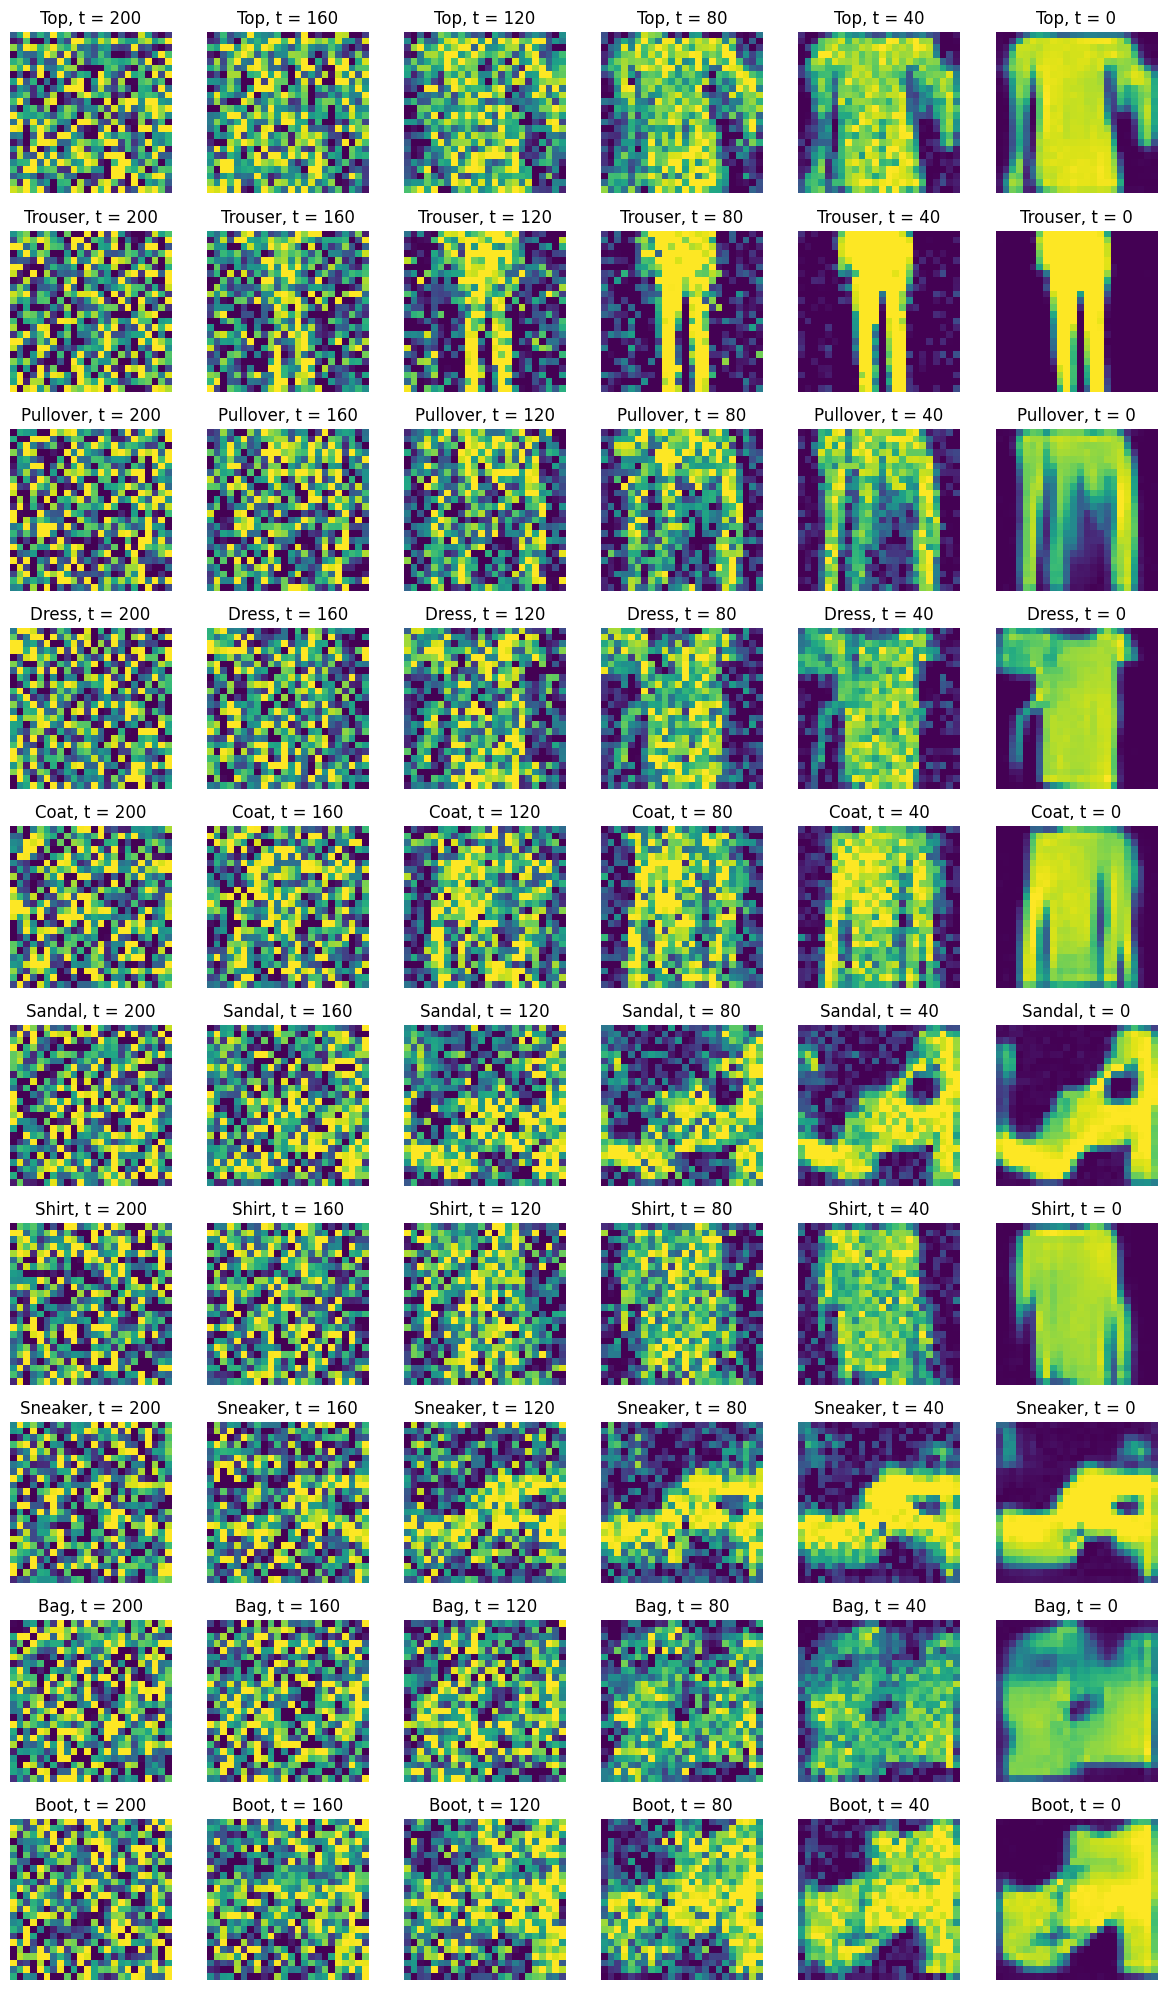

 30%|███       | 9/30 [06:58<16:02, 45.85s/it]INFO:StyleSynth_Logger:Epoch 10 / 30
INFO:StyleSynth_Logger:Average loss across batch at final step of epoch: 0.06677945703268051


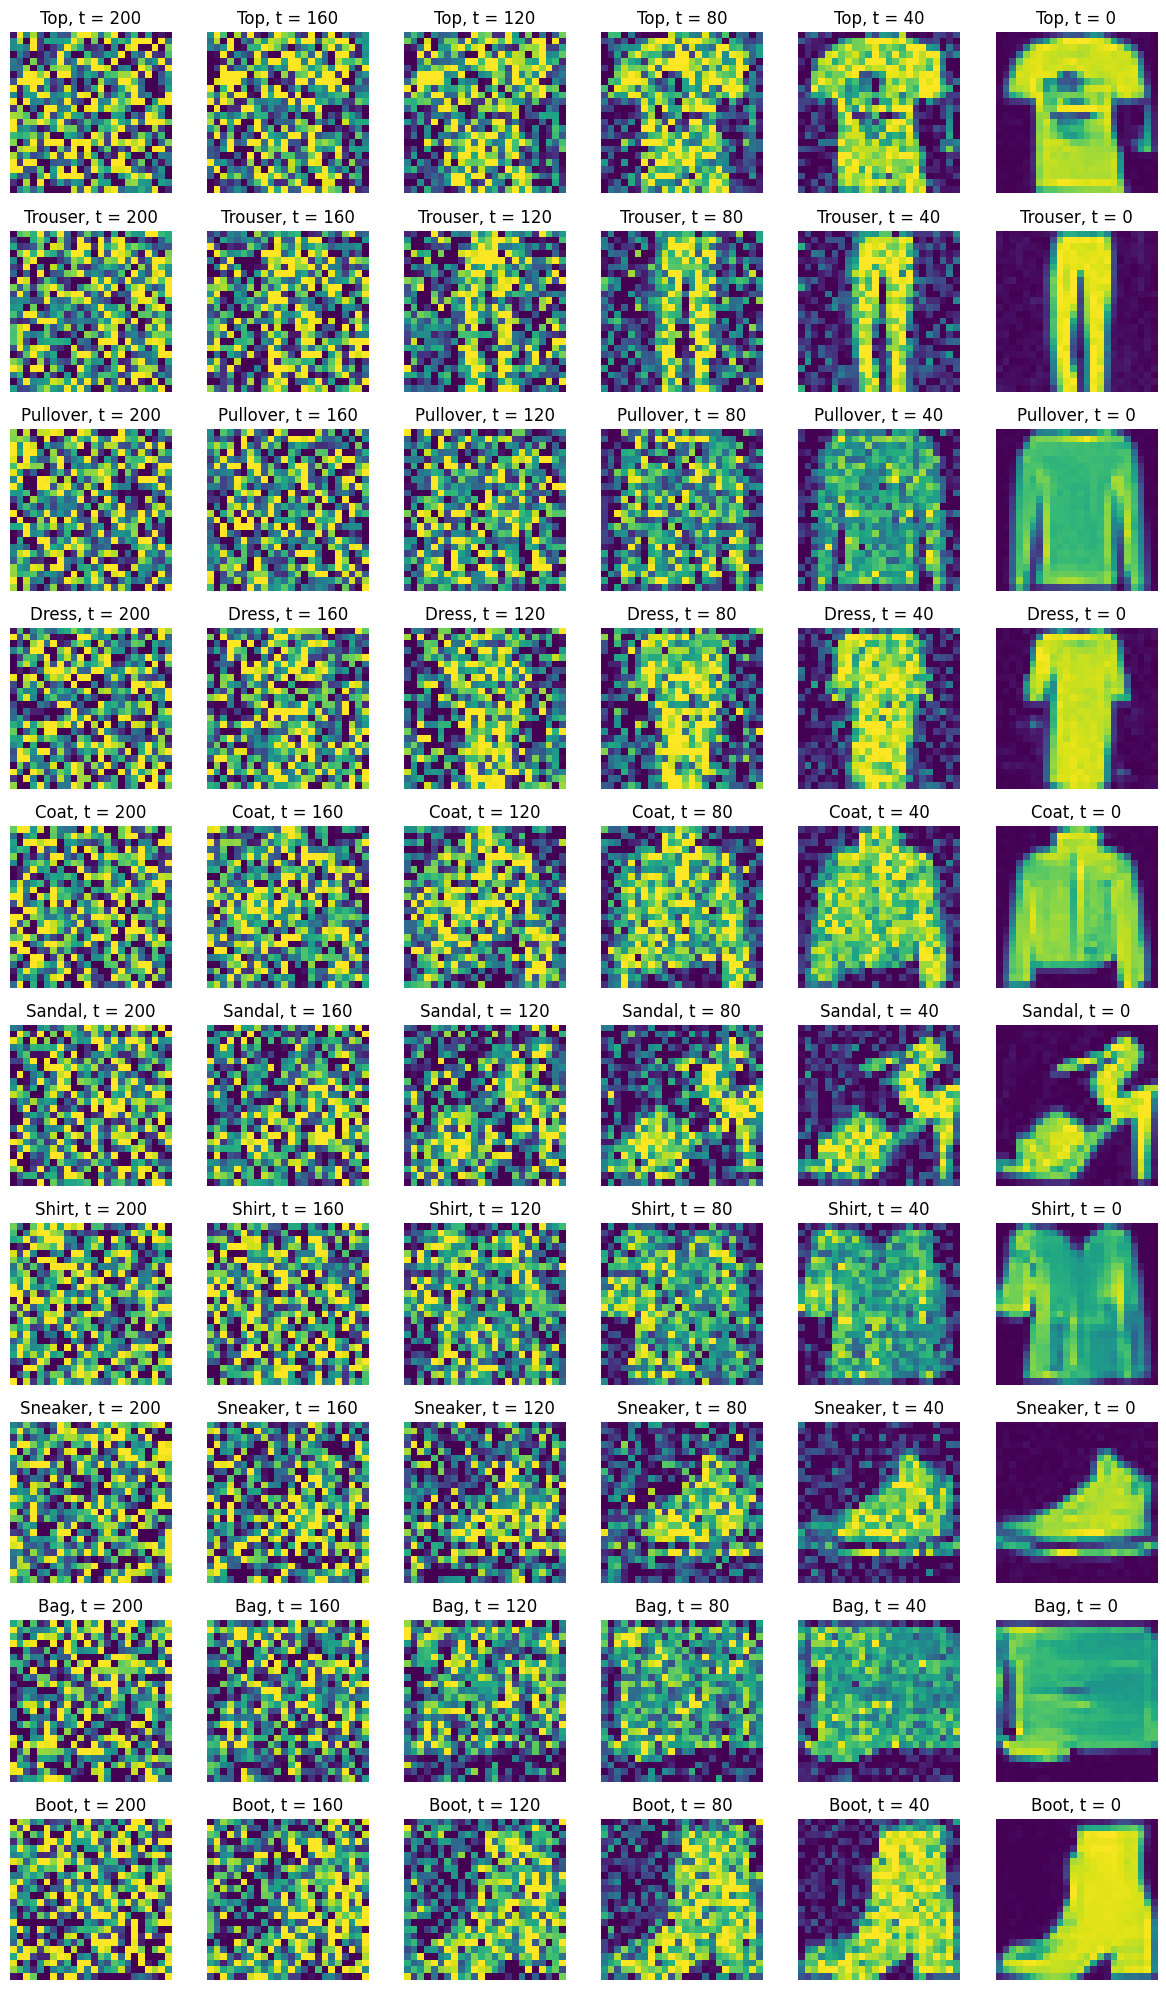

 63%|██████▎   | 19/30 [14:41<08:23, 45.73s/it]INFO:StyleSynth_Logger:Epoch 20 / 30
INFO:StyleSynth_Logger:Average loss across batch at final step of epoch: 0.067023366689682


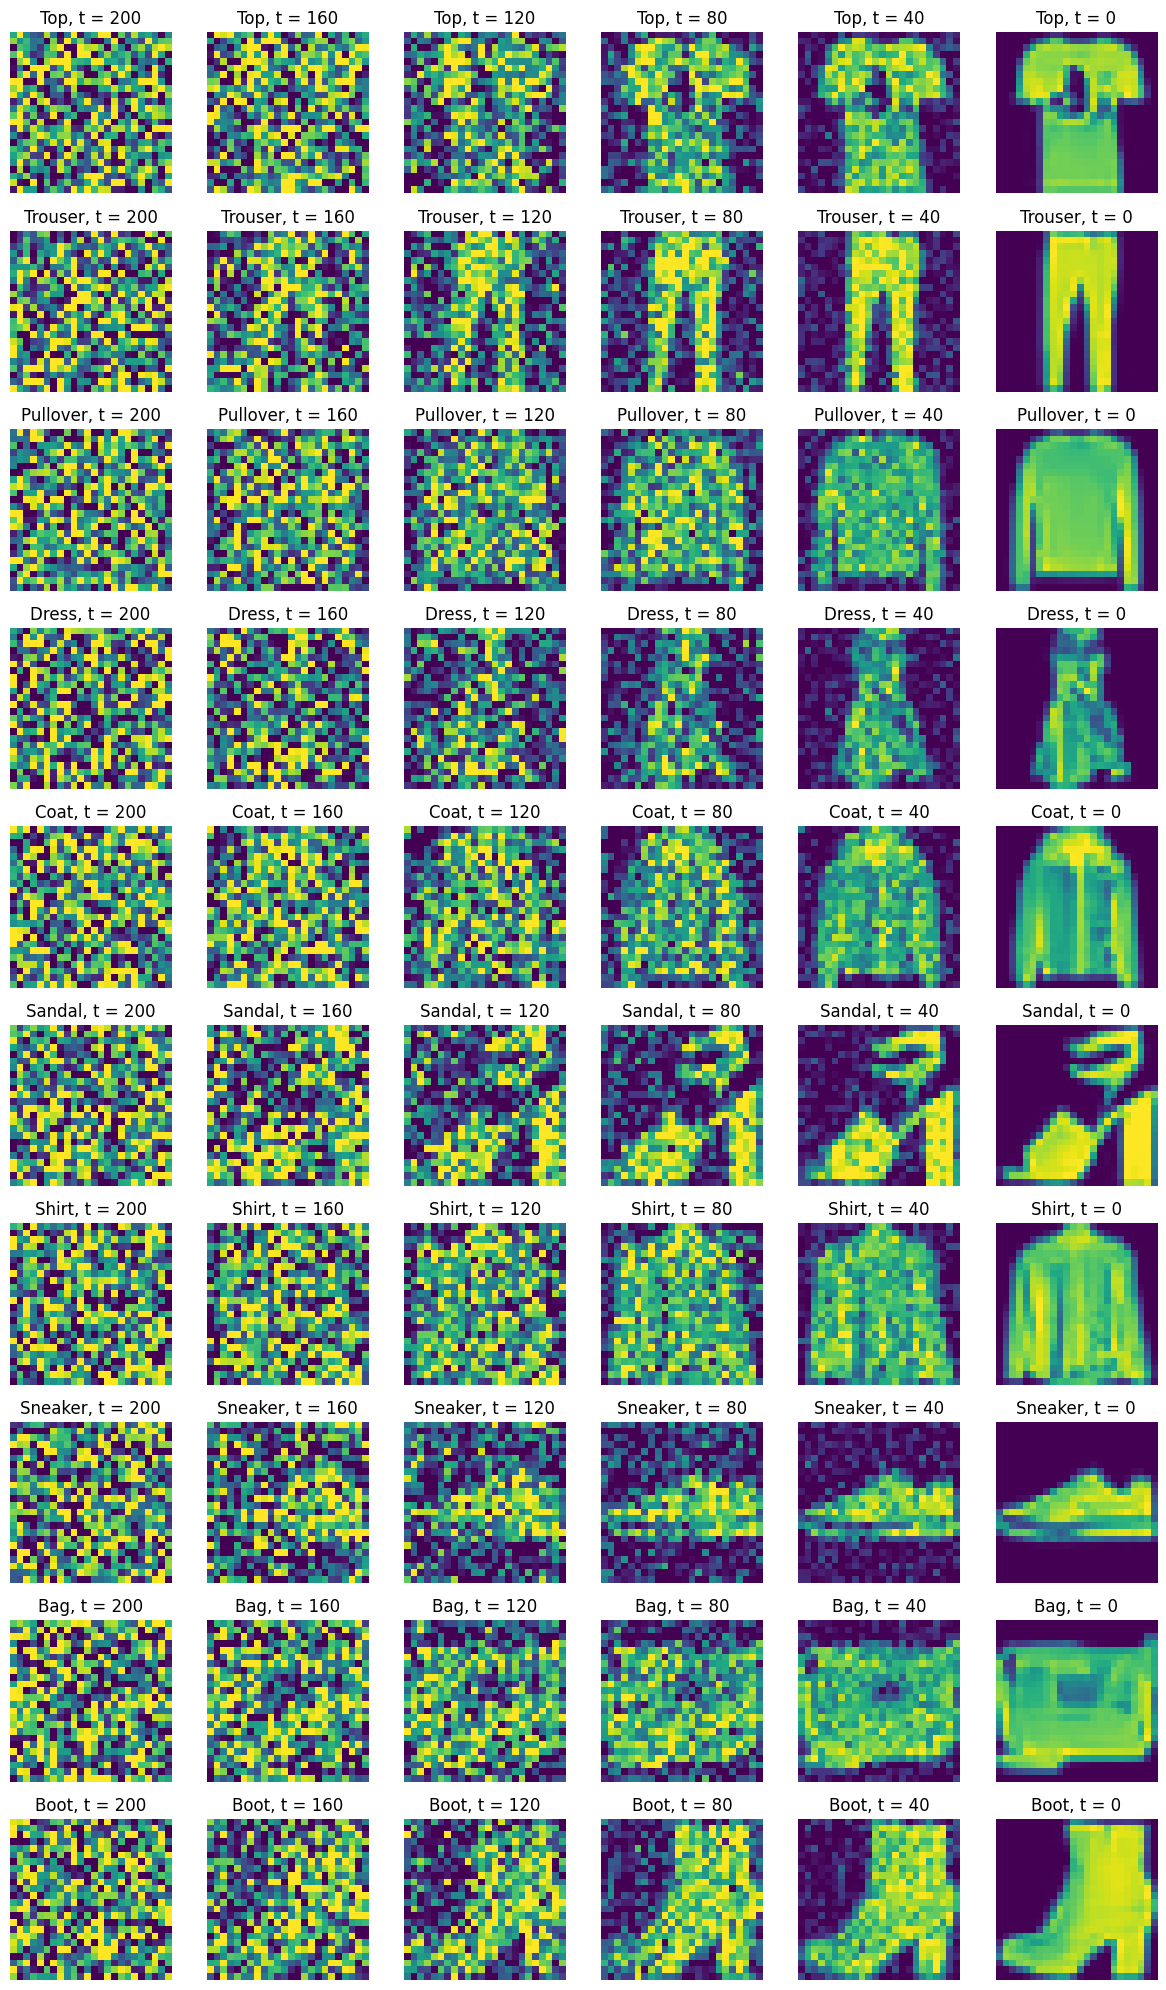

 97%|█████████▋| 29/30 [22:24<00:45, 45.72s/it]INFO:StyleSynth_Logger:Epoch 30 / 30
INFO:StyleSynth_Logger:Average loss across batch at final step of epoch: 0.06825418025255203


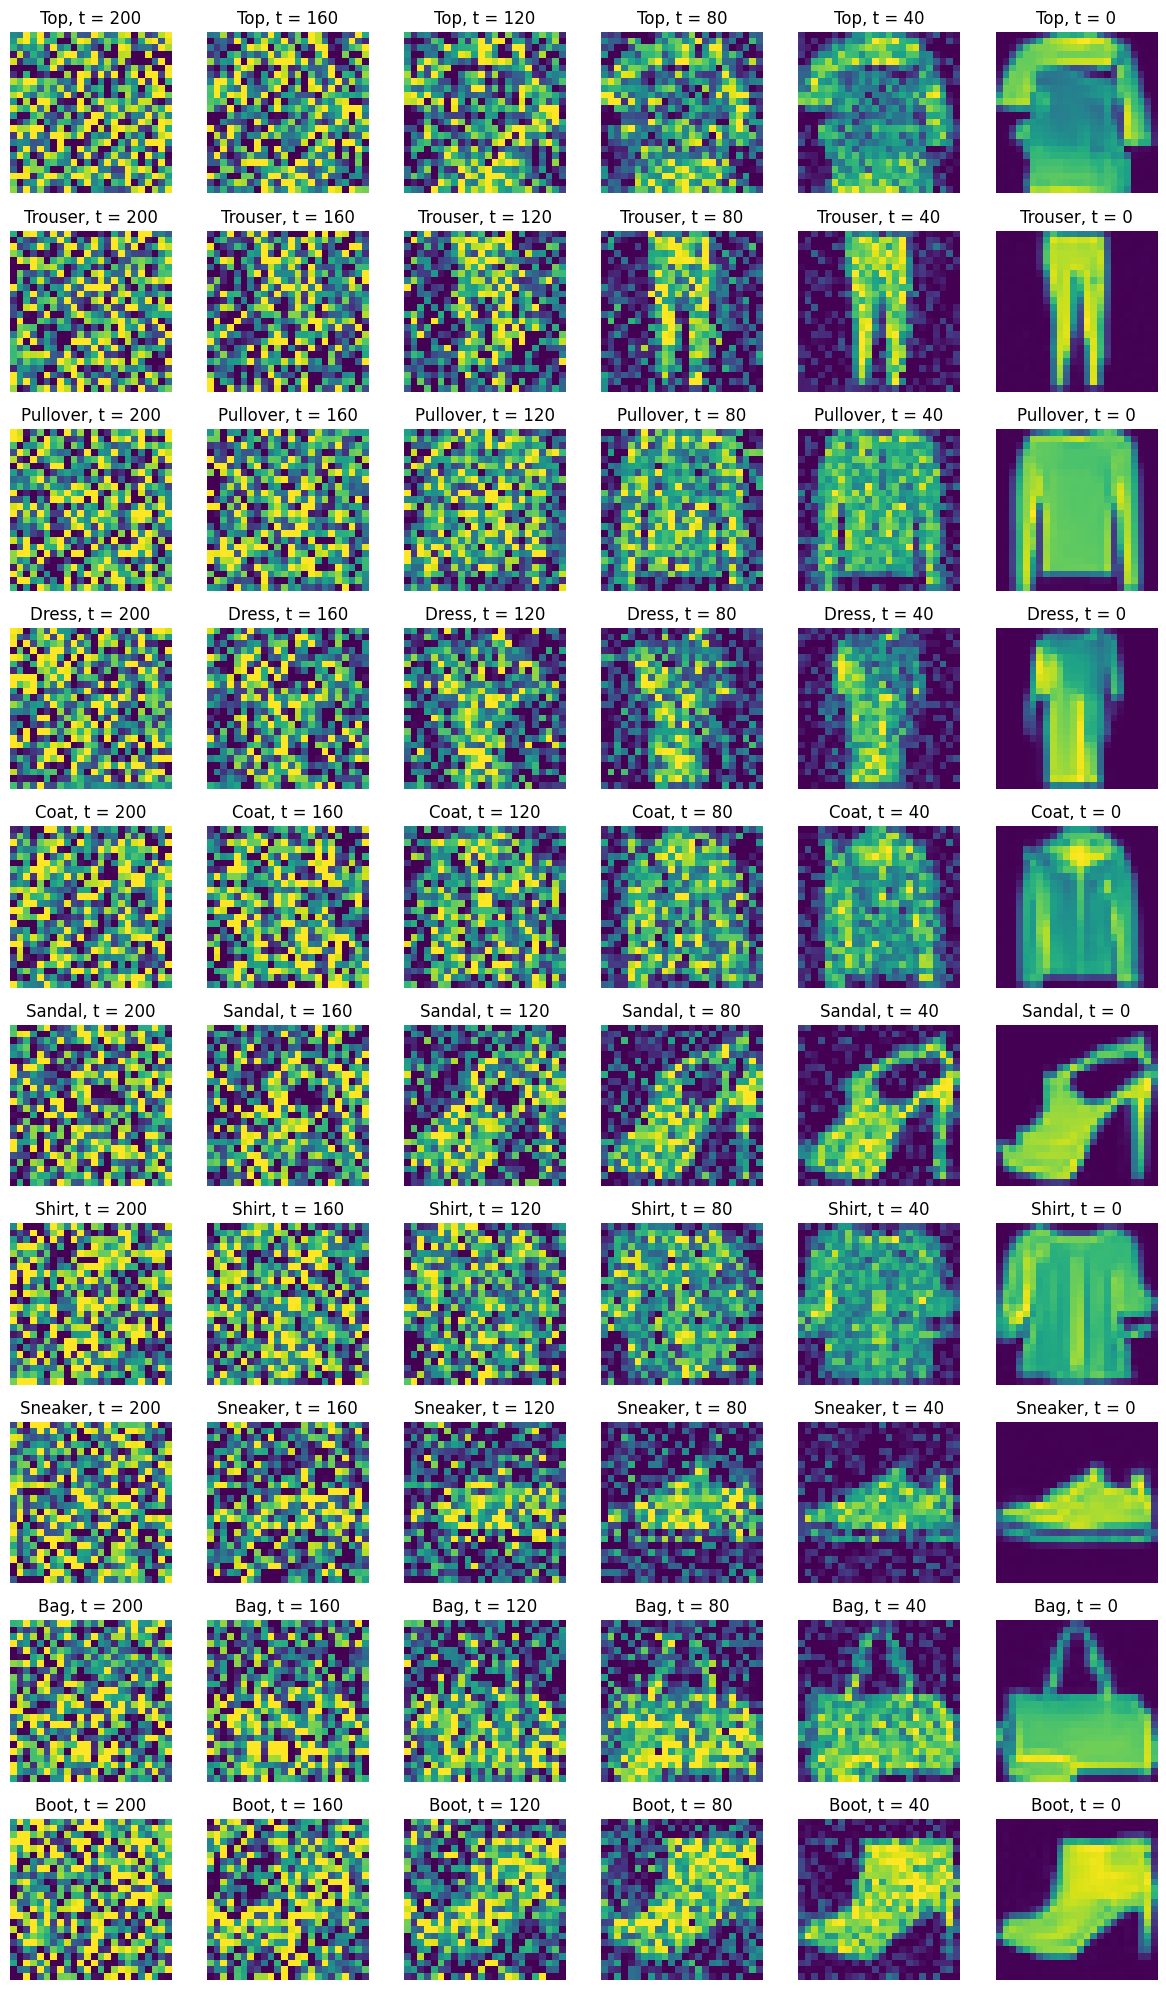

100%|██████████| 30/30 [23:16<00:00, 46.54s/it]
INFO:StyleSynth_Logger:Training complete


In [3]:
ss.train(img_size=24, epochs=30, batch_size=128, vis_interval=10)

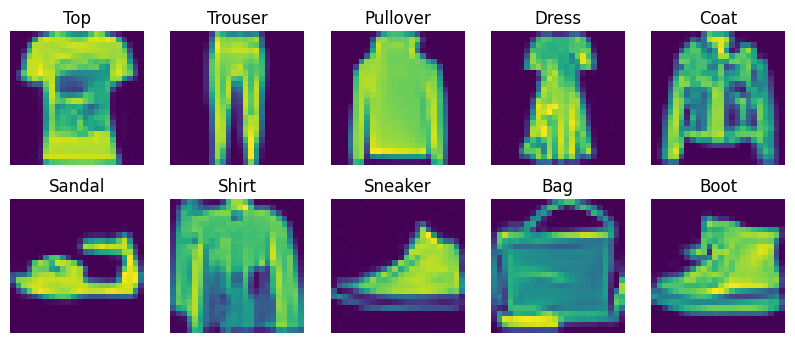

In [7]:
# generate an image for each image class
CLOTHING_TYPES = [
    'Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker',
    'Bag', 'Boot']
imgs = ss.generate(CLOTHING_TYPES)

# display images
num_rows = 2
num_cols = len(CLOTHING_TYPES) // 2
_, axes = plt.subplots(
    nrows=num_rows, ncols=num_cols,
    figsize=(num_cols * 2, num_rows * 2))
for i in range(len(imgs)):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].imshow(imgs[i])
    axes[row, col].axis('off')
    axes[row, col].set_title(f'{CLOTHING_TYPES[i]}')